In [ ]:
rimport pandas as pd

In [ ]:
df_duro = pd.read_excel('Datos Historicos Trigo Duro 2019 - 2024.xlsx')
df_duro.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Precio_Ton
0,2019-01-02,490.00,497.25,487.75,492.5,492.5,22636,180.962723
1,2019-01-03,492.25,504.50,492.25,503.5,503.5,19855,185.004529
2,2019-01-04,504.00,508.75,503.50,506.0,506.0,16023,185.923122
3,2019-01-07,506.25,507.25,500.50,503.0,503.0,16884,184.820811
4,2019-01-08,501.00,510.25,499.00,505.0,505.0,22437,185.555685


In [ ]:
df_cris = pd.read_excel('Datos Historicos Trigo Cristalino 2019 - 2024.xlsx')
df_cris.head()

,Date,Open,High,Low,Close,Adj Close,Volume,USD/TON
0,2019-01-02,502.50,510.75,501.25,506.75,506.75,46442,186.198700
1,2019-01-03,506.75,516.00,506.00,513.75,513.75,48800,188.770759
2,2019-01-04,513.75,518.75,513.00,517.00,517.00,44054,189.964929
3,2019-01-07,518.00,518.50,513.50,516.75,516.75,41549,189.873070
4,2019-01-08,516.50,524.50,513.75,517.75,517.75,71731,190.240507


In [ ]:
columnas_seleccionadas = ['Open', 'High', 'Low', 'Volume', 'Close', 'Adj Close']
df_cris = df_cris[columnas_seleccionadas]
df_cris.head()

,Open,High,Low,Volume,Close,Adj Close
0,502.50,510.75,501.25,46442,506.75,506.75
1,506.75,516.00,506.00,48800,513.75,513.75
2,513.75,518.75,513.00,44054,517.00,517.00
3,518.00,518.50,513.50,41549,516.75,516.75
4,516.50,524.50,513.75,71731,517.75,517.75


In [ ]:
df_cris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1352 non-null   float64
 1   High    1352 non-null   float64
 2   Low     1352 non-null   float64
 3   Volume  1352 non-null   int64  
 4   Close   1352 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 52.9 KB


In [ ]:
df_duro.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Precio_Ton    0
dtype: int64

# Value At Risk (VAR)

---


In [ ]:
# Importar librerías
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df_var_duro = df_duro[['Date', 'Adj Close']]
df_var_duro

,Date,Adj Close
0,2019-01-02,492.50
1,2019-01-03,503.50
2,2019-01-04,506.00
3,2019-01-07,503.00
4,2019-01-08,505.00
...,...,...
1347,2024-05-09,675.75
1348,2024-05-10,697.25
1349,2024-05-13,724.00
1350,2024-05-14,724.00


In [ ]:
df_var_cris = df_cris[['Date', 'Adj Close']]
df_var_cris

,Date,Adj Close
0,2019-01-02,506.75
1,2019-01-03,513.75
2,2019-01-04,517.00
3,2019-01-07,516.75
4,2019-01-08,517.75
...,...,...
1347,2024-05-09,619.75
1348,2024-05-10,645.75
1349,2024-05-13,670.25
1350,2024-05-14,657.00


In [ ]:
# Realizar el inner join sobre la columna 'Date'
df_var = pd.merge(df_var_duro, df_var_cris, on='Date', how='inner')

# Mostrar el DataFrame resultante
print(df_var)

           Date  Adj Close_x  Adj Close_y
0    2019-01-02       492.50       506.75
1    2019-01-03       503.50       513.75
2    2019-01-04       506.00       517.00
3    2019-01-07       503.00       516.75
4    2019-01-08       505.00       517.75
...         ...          ...          ...
1347 2024-05-09       675.75       619.75
1348 2024-05-10       697.25       645.75
1349 2024-05-13       724.00       670.25
1350 2024-05-14       724.00       657.00
1351 2024-05-15       675.75       666.75

[1352 rows x 3 columns]


In [ ]:
df_var.rename(columns={'Adj Close_x': 'CHIICAGO SRW', 'Adj Close_y': 'KC HRW'}, inplace=True)
df_var

,Date,CHIICAGO SRW,KC HRW
0,2019-01-02,492.50,506.75
1,2019-01-03,503.50,513.75
2,2019-01-04,506.00,517.00
3,2019-01-07,503.00,516.75
4,2019-01-08,505.00,517.75
...,...,...,...
1347,2024-05-09,675.75,619.75
1348,2024-05-10,697.25,645.75
1349,2024-05-13,724.00,670.25
1350,2024-05-14,724.00,657.00


In [ ]:
# Convertir la columna 'Date' a formato datetime
df_var['Date'] = pd.to_datetime(df_var['Date'])

# Configurar la columna 'Date' como el índice del DataFrame
df_var.set_index('Date', inplace=True)

# Ahora puedes ver el DataFrame con 'Date' como índice
print(df_var)

            CHIICAGO SRW  KC HRW
Date                            
2019-01-02        492.50  506.75
2019-01-03        503.50  513.75
2019-01-04        506.00  517.00
2019-01-07        503.00  516.75
2019-01-08        505.00  517.75
...                  ...     ...
2024-05-09        675.75  619.75
2024-05-10        697.25  645.75
2024-05-13        724.00  670.25
2024-05-14        724.00  657.00
2024-05-15        675.75  666.75

[1352 rows x 2 columns]


In [ ]:
# Calcular los daily log returns y quitar los NAs
log_returns=np.log(df_var/df_var.shift(1))
log_returns = log_returns.dropna()

log_returns

,CHIICAGO SRW,KC HRW
Date,,
2019-01-03,0.022089,0.013719
2019-01-04,0.004953,0.006306
2019-01-07,-0.005946,-0.000484
2019-01-08,0.003968,0.001933
2019-01-09,0.000990,0.004336
...,...,...
2024-05-09,0.026238,0.006069
2024-05-10,0.031321,0.041096
2024-05-13,0.037647,0.037238


In [ ]:
# Create an equally weighted portfolio
portfolio_value = 1000000
# weights = np.array([1/len(tickers)]*len(tickers))
weights = np.array([1/len(df_var.columns)]*len(df_var.columns))
print(weights)

[0.5 0.5]


In [ ]:
# Create the historical portfolio returns
historical_returns = (log_returns * weights).sum(axis=1)
print(historical_returns)

Date
2019-01-03    0.017904
2019-01-04    0.005630
2019-01-07   -0.003215
2019-01-08    0.002951
2019-01-09    0.002663
                ...   
2024-05-09    0.016154
2024-05-10    0.036209
2024-05-13    0.037443
2024-05-14   -0.009983
2024-05-15   -0.027119
Length: 1351, dtype: float64


In [ ]:
# Find the X-day historical returns
days = 5
historical_x_day_returns = historical_returns.rolling(window=days).sum()

In [ ]:
# Create a covariance matrix for all the securities
# 252 because there are 252 trading days in a year
cov_matrix = log_returns.cov() * 252

In [ ]:
# Calculate portfolio standard deviation
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [ ]:
# Set different confidence levels to visualize
confidence_levels = [0.9, 0.95, 0.99]

In [ ]:
VaRs = []

for cl in confidence_levels:
  VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days/252)
  VaRs.append(VaR)

In [ ]:
# Print out VaR Results
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

# Print each confidence level and its corresponding VaR value
for cl, VaR in zip(confidence_levels, VaRs):
  print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 59,256.62
    95%:          $ 76,055.05
    99%:          $107,566.11


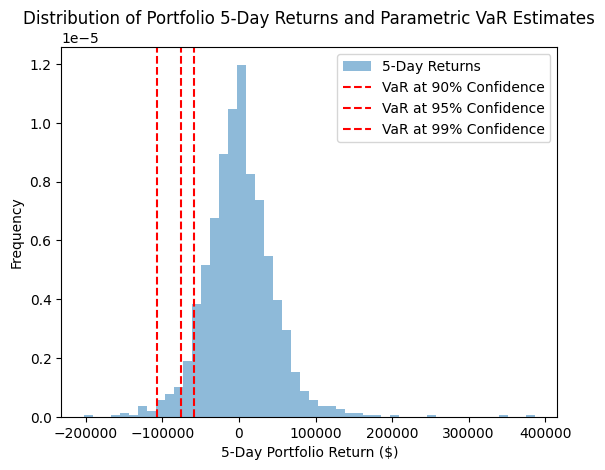

In [ ]:
# Set labels, title and legend
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
  plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(cl*100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

# Preprocesamiento

----

In [ ]:
#Cambiar tipo de fecha
df_cris.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

In [ ]:
df_cris['Date_float'] = df_cris['Date'].map(pd.Timestamp.timestamp)

In [ ]:
df_cris.info()

In [ ]:
df_cris.describe()

In [ ]:
import seaborn as sns

# Matriz de correlacion
cormat = df_cris.corr()

# Grafica de correlacion
sns.heatmap(cormat, vmax=1, square=True)

In [ ]:
cormat

In [ ]:
X = df_cris.drop(['Close', 'Open', 'High', 'Low'], axis=1)
X.shape

In [ ]:
y = df_cris['Close']
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##  Modelado

In [ ]:
# Grafica de regresion utilizando Seaborn en vez de matplotlib
sns.lmplot(x='Date_float', y='Close', data=df_cris)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear un grid de gráficos de 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()  # Aplanar el array de ejes para un fácil acceso


# Iterar sobre diferentes grados de polinomios de 1 a 9
for n in range(1, 10):
    poly_reg = PolynomialFeatures(degree=n)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    # Seleccionar el eje correspondiente
    ax = axes[n-1]

    # Graficar los datos originales
    ax.scatter(X, y, color='red')

    # Graficar la predicción polinómica
    ax.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
    ax.set_title(f'Regresión Polinomial (grado {n})')
    ax.set_xlabel('Superficie Cosechada')
    ax.set_ylabel('Producción')


# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()
